### Problem Statement - Predicting Customer Subscription for Term Deposits in a Portuguese Bank (Classification)

The objective of this project is to analyze a dataset related to a marketing campaign conducted by a Portuguese bank and utilize machine learning algorithms to predict whether clients will subscribe to a term deposit.

The goal is to develop a predictive model that can accurately identify potential clients who are more likely to subscribe to a term deposit.

In this project, the focus on minimizing False Negative errors. False Negative errors occur when the model predicts that a client will not subscribe to a term deposit, but they actually end up subscribing.

To evaluate the model's performance, the chosen evaluation metric is likely to be Recall. Recall measures the model's ability to correctly identify positive instances (clients who will subscribe to a term deposit) out of all the actual positive instances.

By achieving a high Recall score and accurately predicting clients who are more likely to subscribe to a term deposit, the bank can make informed decisions to improve their marketing campaigns and increase the likelihood of successful outcomes.

* Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

* Load the Dataset

In [2]:
data = pd.read_csv('bank-additional-full.csv')

In [3]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


* Display all columns

In [4]:
pd.set_option('display.max_columns',None)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


The dataset comprises 41,188 entries and 21 columns, representing information on bank marketing campaigns. Each row corresponds to a customer, and the columns contain various attributes such as age, job, marital status, education, contact details, campaign information, economic indicators, and the deposit outcome.

# Domain Analysis

age - age of the client.

job - type of job the client does.

marital - marital status of the client. 

education - level of client education 

default - "default" typically refers to a situation where a client has failed to fulfill their repayments according to the agreed terms. 

housing - The term "housing" usually refers to a client who has taken out a loan specifically for purchasing a house.

loan - The term "loan" refers to a client who has a any personal loan.

contact - Communication type during contact to a client.

month - Month of the year, when made last contact with the client.

day_of_week - Last contact day of the week with client

duration - Last contact duration, in seconds. Note: this attribute highly affects the output target (e.g., if duration=0 then y="no").

campaign - Number of contacts performed during this campaign and for this client. 

pdays - Number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted). If the client was not previously contacted, the value for "pdays" is set to 999

previous - "previous" refers to the number of contacts performed before this campaign and for this client (numeric)

poutcome - outcome of the previous marketing campaign with respect to the client subscribed to the deposit or not.

emp.var.rate (employment variation rate) - emp.var.rate, measures the percentage increase or decrease in the number of employees within a three-month period

cons.price.idx (consumer price index) - CPI measures the change in price of the goods and services such as food, transport, healthcare with respect to the last expenditures.

cons.conf.idx (consumer confidence index) - This monthly indicator reflects the sentiment and confidence levels of consumers regarding the overall economic situation. 

euribor3m (euribor 3 month rate) - Higher Euribor rates generally indicate that the cost of borrowing money is higher, 
which may discourage clients from taking out loans or other forms of credit, such as term deposits. 
On the other hand, lower Euribor rates may incentivize clients to borrow money, including subscribing to a term deposit.

nr.employed (number of employees) - This quarterly indicator represents the total number of employed individuals within a specific timeframe. 

y - has the client subscribed to a term deposit? It is a target variable.

* Rename target variable

In [5]:
data.rename(columns={'y':'deposit'},inplace = True)

In [6]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

# Basic Checks

In [7]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
data.shape

(41188, 21)

In [12]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
deposit            object
dtype: object

In [13]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

There is no null value.

In [14]:
data.duplicated().sum()

12

* Categorical Features only

In [15]:
cat_col = data.select_dtypes(include='object').columns
cat_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')

# Exploratory Data Analysis

### Univariate Analysis

* Analysis of numerical features by using histogram

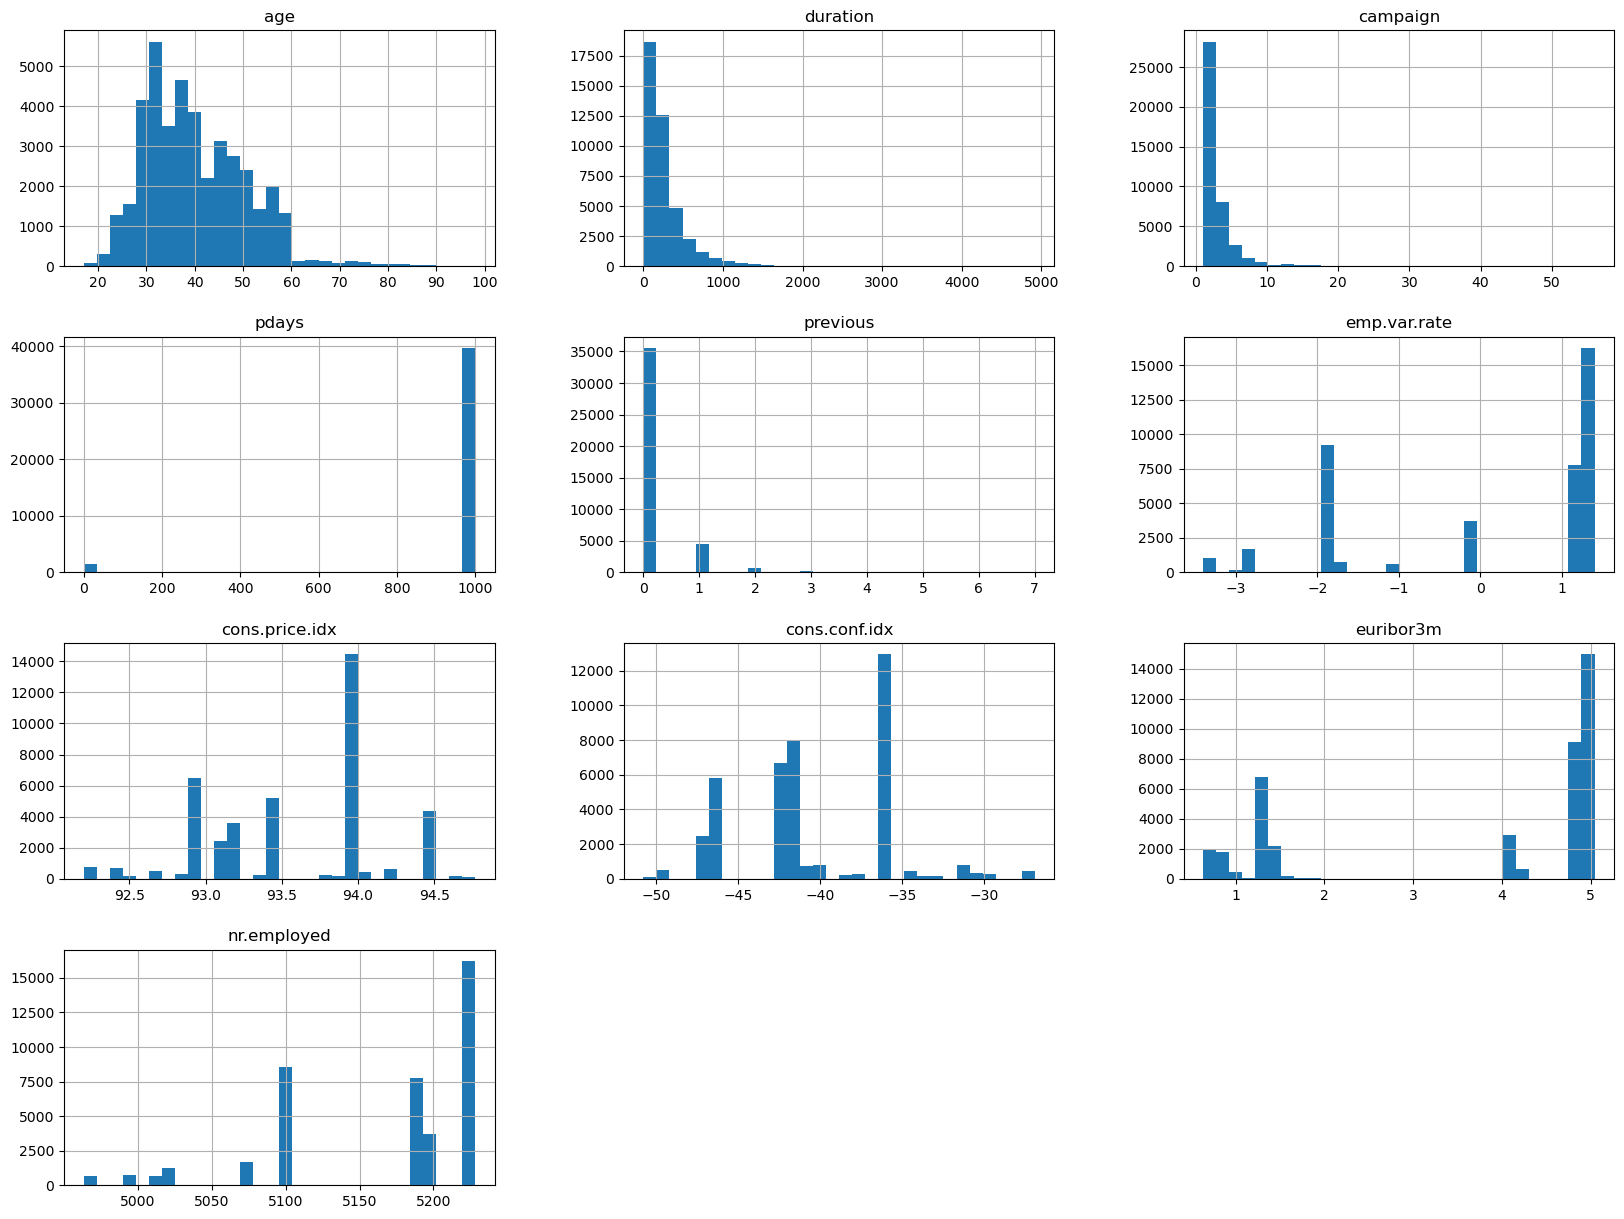

In [16]:
data.hist(bins=30,figsize=(20,15))
plt.show()

Insights from the above graphs :
 
1.The clients age ranges between 28 to 38 having a more count than other ages client. The count is 4000 to 5000.

2.The highest count(more than 17500) of the call duration is of 0 to 150 seconds.

3.There is the 1 & 2 campaigns has the highest count which is more than 25000.

4.There is more count of the pdays=999 and it indicates almost client was not lastly contacted. 

5.Almost of the client has 0 number of contacts performed before this campaign.

* Analysis of categorical features by using countplot

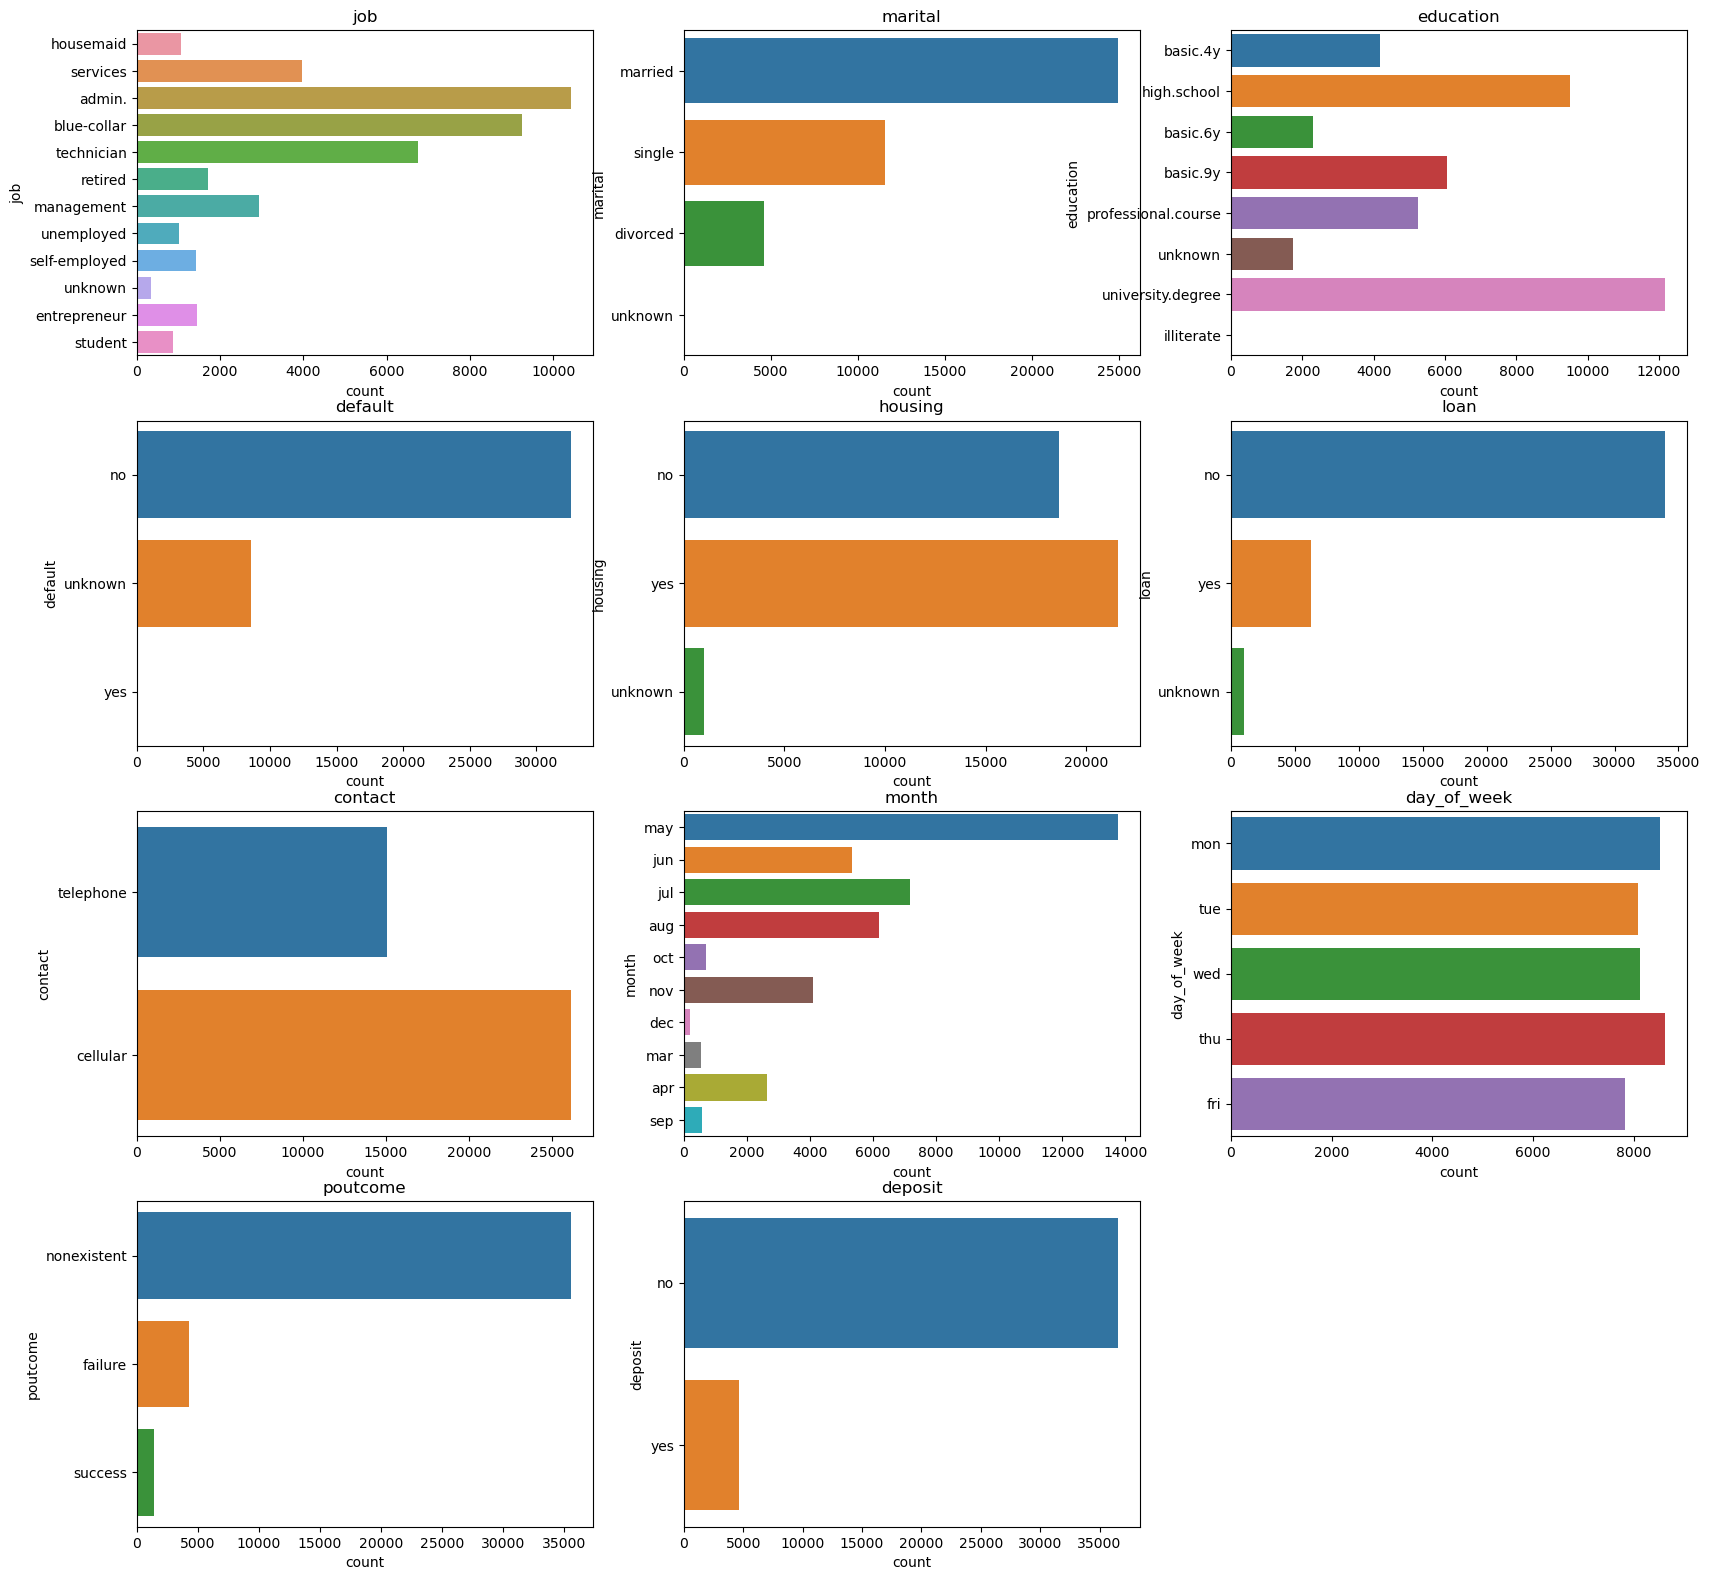

In [17]:
plt.figure(figsize=(20,60),facecolor='White')
plotnumber = 1
for categorical_features in cat_col:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_features,data=data)
    plt.xlabel('count')
    plt.title(categorical_features)
    plotnumber+=1
plt.show()

Insights from the above graph:

In the "Job" category, the majority of clients have an administrative job, while the lowest number of clients work as housemaids.

Regarding marital status, the count of married clients is the highest, reaching up to 25,000, followed by single clients with a count of around 12,000. The count of divorced clients is lower, approximately 4,500.

In terms of education, the highest number of clients, up to 12,000, have university degrees. It appears that there are no clients classified as illiterate.

The count of clients with a default status of "no" is 30,000, while the count of clients with a default status of "yes" is 8,000.

The count of clients with a housing loan is roughly equal to the count of clients without a housing loan.

Among the clients, approximately 34,000 have no personal loan, while around 7,000 have a personal loan. This suggests that a majority of people may be inclined to subscribe to the deposit term.

The count of clients contacted through telecommunications is lower compared to those contacted via cellular means.

The month of May has the highest count of clients, reaching approximately 14,000, while December has the lowest count, with close to zero.

Clients were contacted during weekdays from Monday to Friday, and the count for each day is roughly similar, reaching up to 8,000.

The majority of contacts were classified as "nonexistent," with a count of 35,000. Failures were recorded with a count of around 5,000. The count for successful contacts is comparatively lower, ranging between 0 and 1,000.

The output variable "y" indicates whether a client subscribed to the deposit or not. The count of "no" responses is the highest, at 36,000, while the count of "yes" responses is significantly lower in comparison.

* Continious feature distribution

In [18]:
con_col = data.select_dtypes(include=['float','int']).columns.tolist()
print(con_col)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


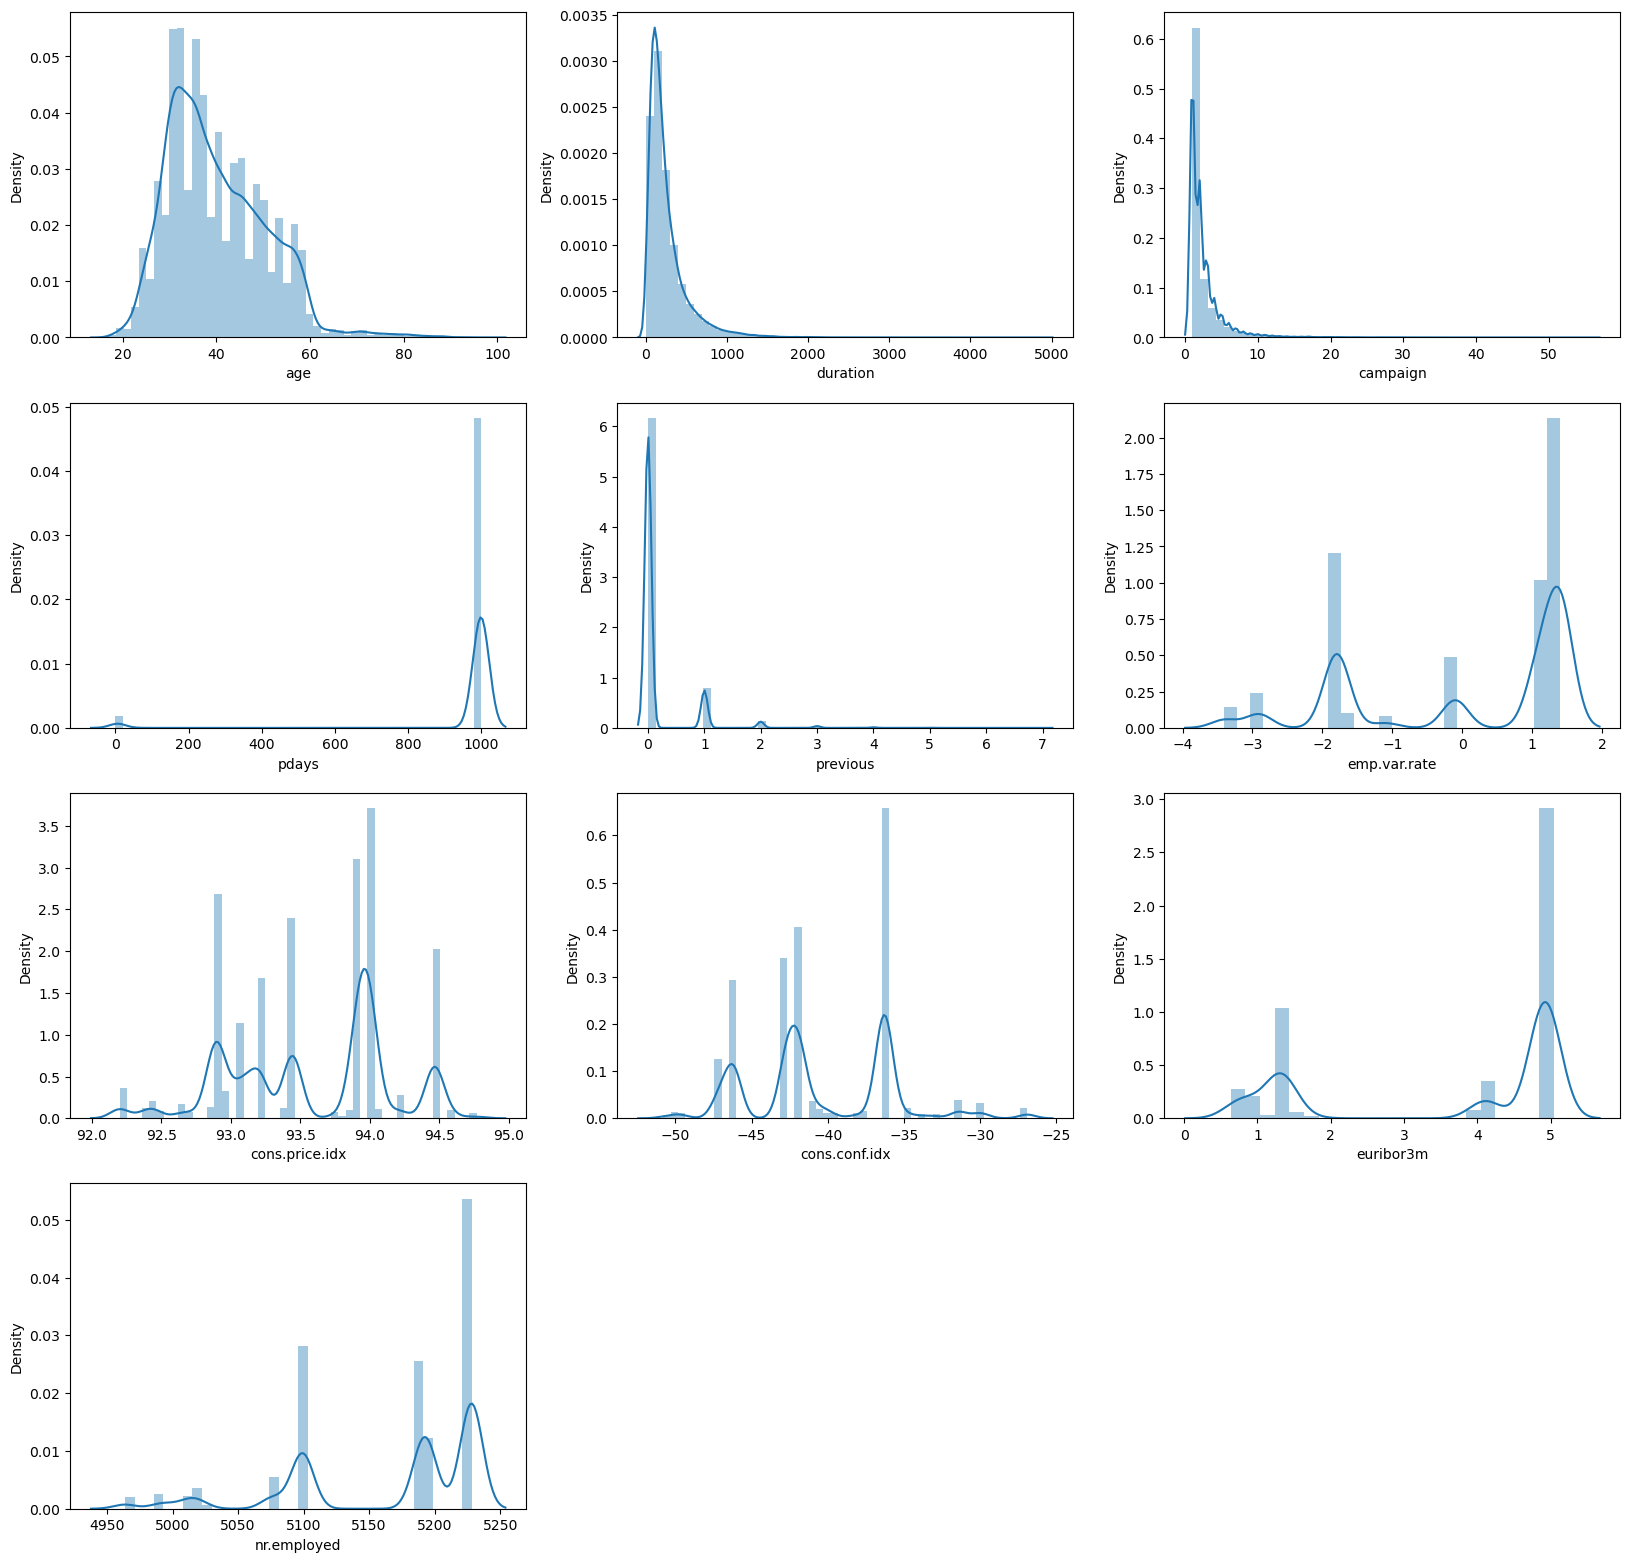

In [19]:
plt.figure(figsize=(20,60),facecolor='White')
plotnumber = 1
for continious_features in con_col:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(data[continious_features])
    plt.xlabel(continious_features)
    plotnumber+=1
plt.show()

Insights from the above graph

Age, duration, and campaign exhibit right-skewness or positive skew, indicating the presence of outliers in these variables.

# Bivariate Analysis

* Check relationship between numerical variable and target variable

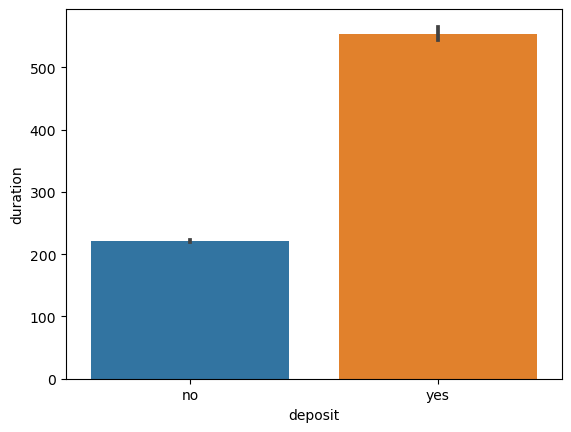

In [20]:
sns.barplot(x=data.deposit,y=data.duration,data=data)
plt.show()

Clients who have had a high duration of contact tend to have the highest count of "yes" for deposit.

* Check relationship between categorical variables and target variable

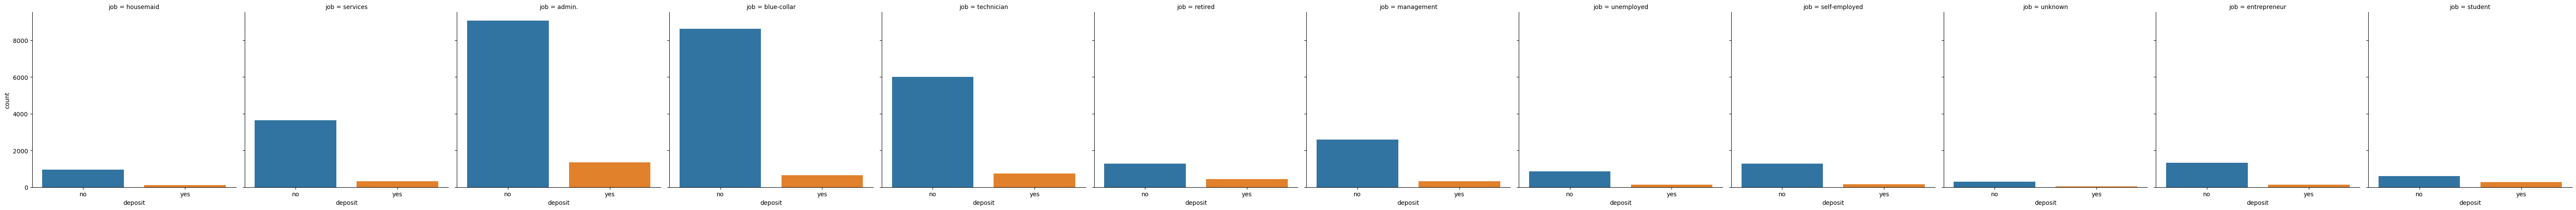

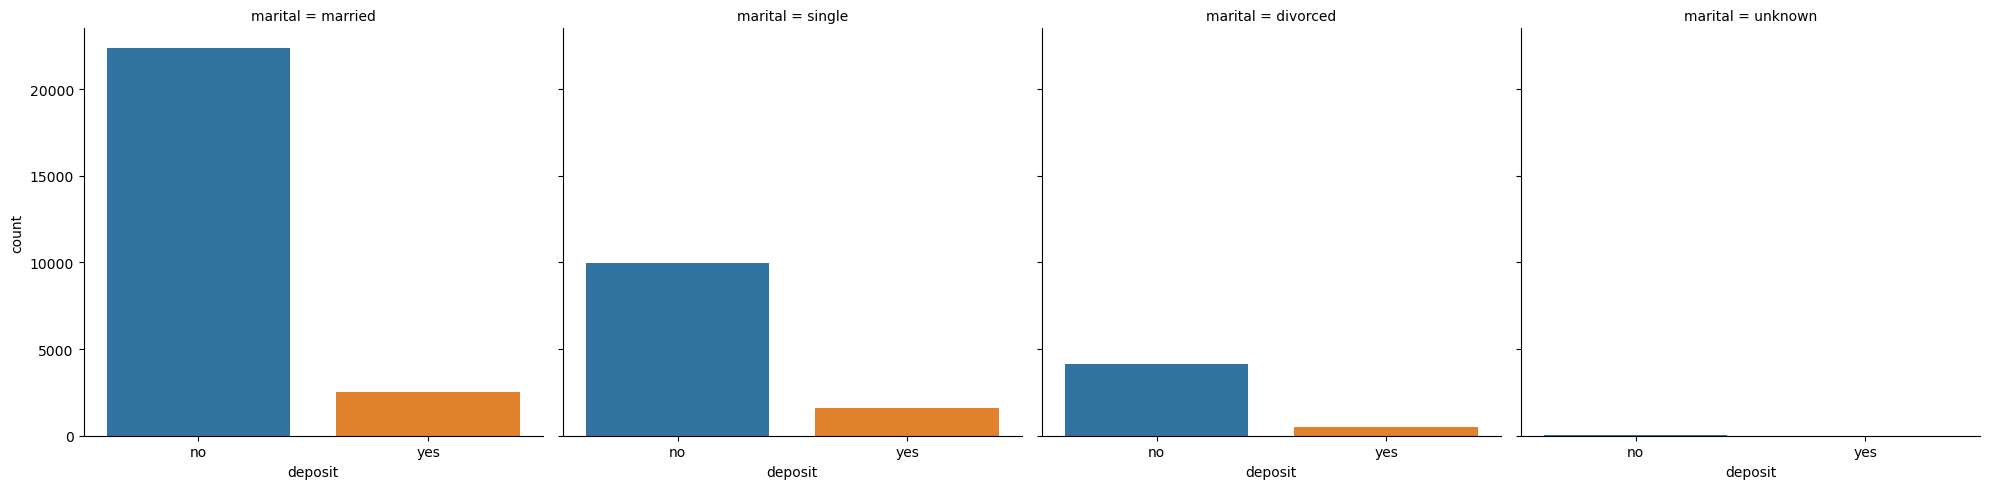

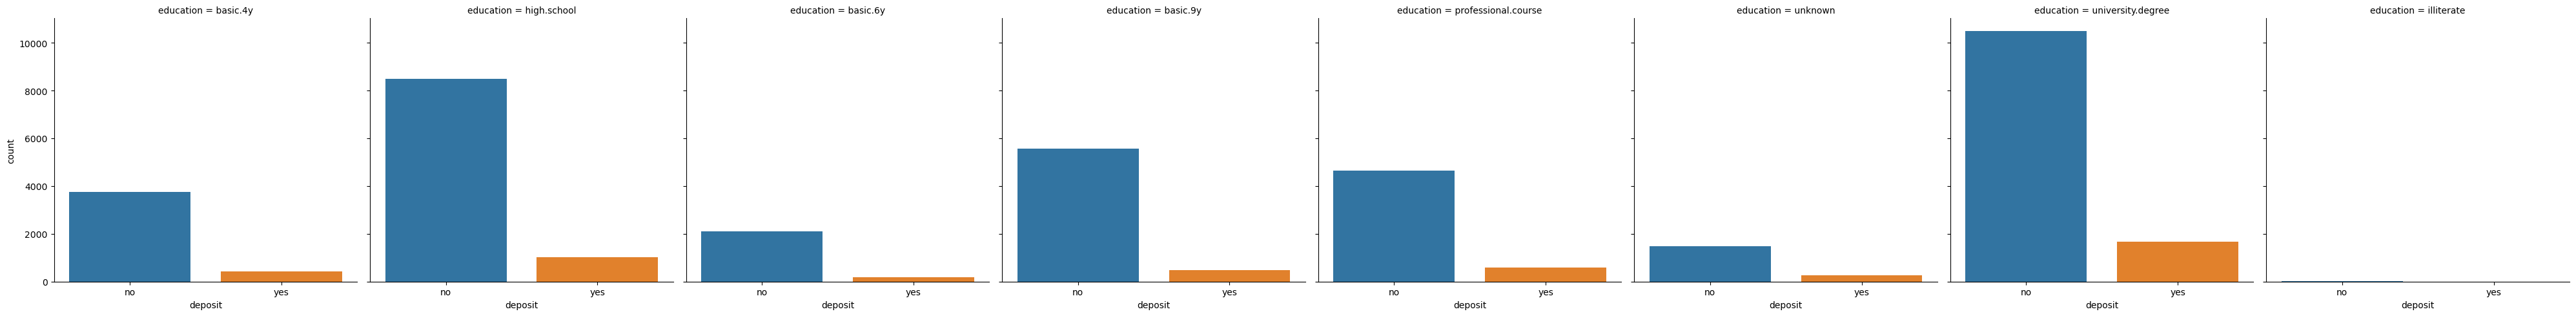

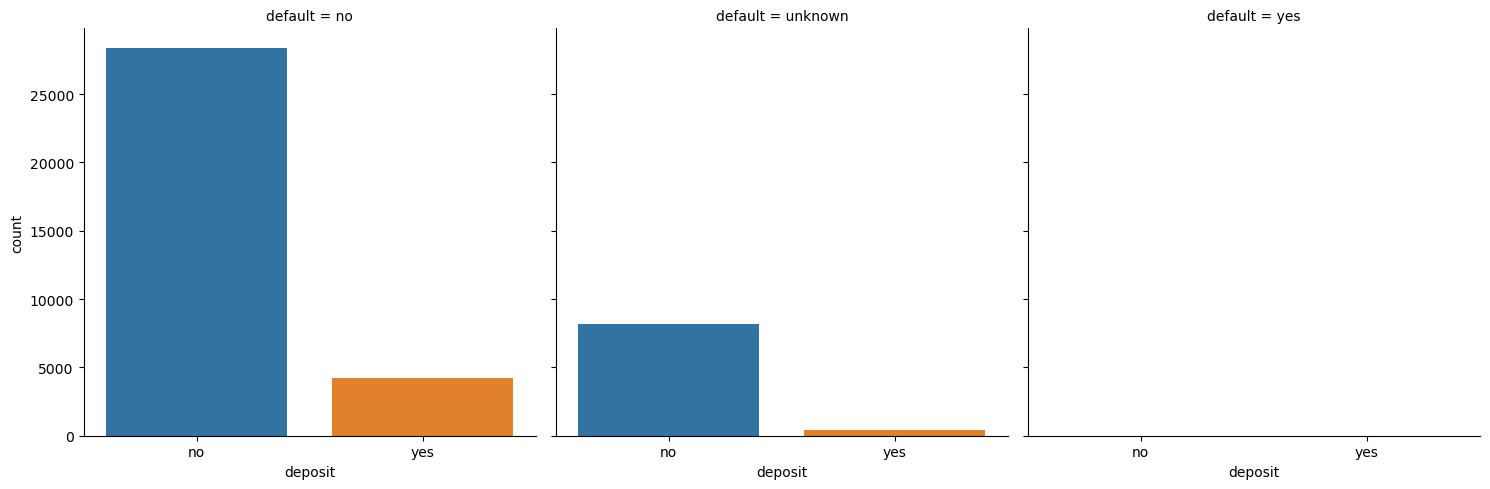

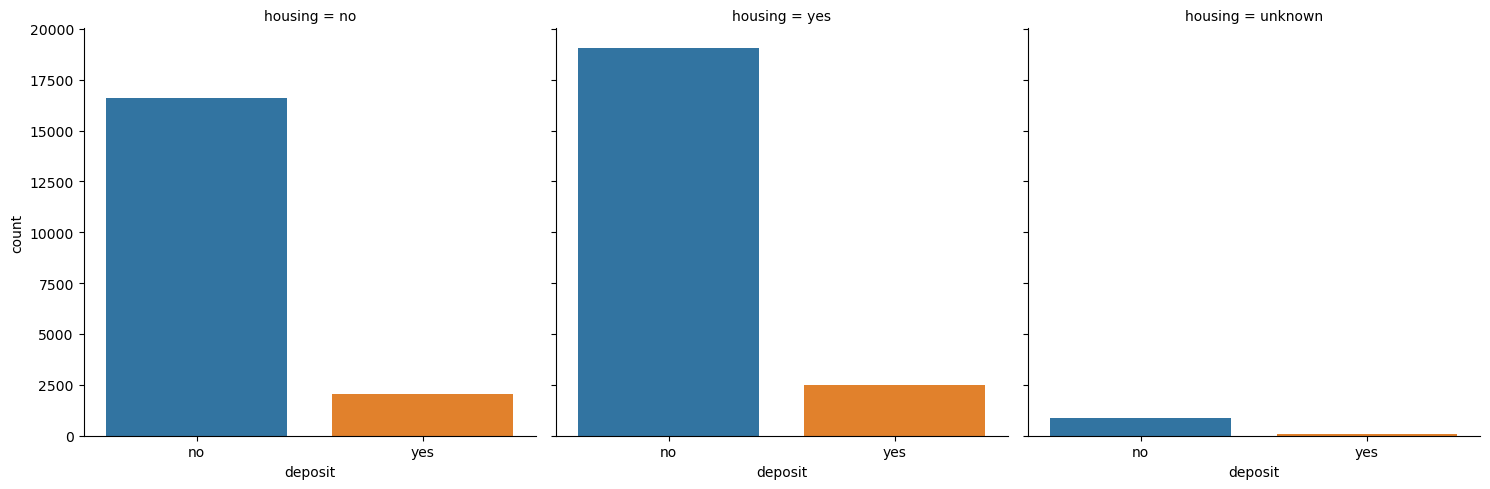

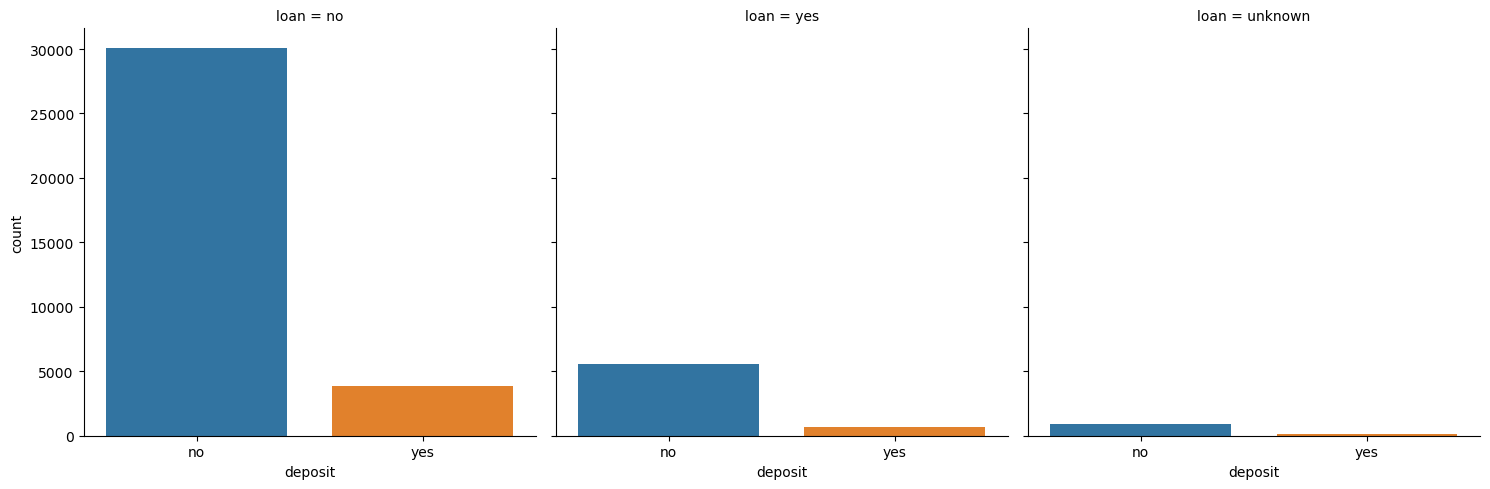

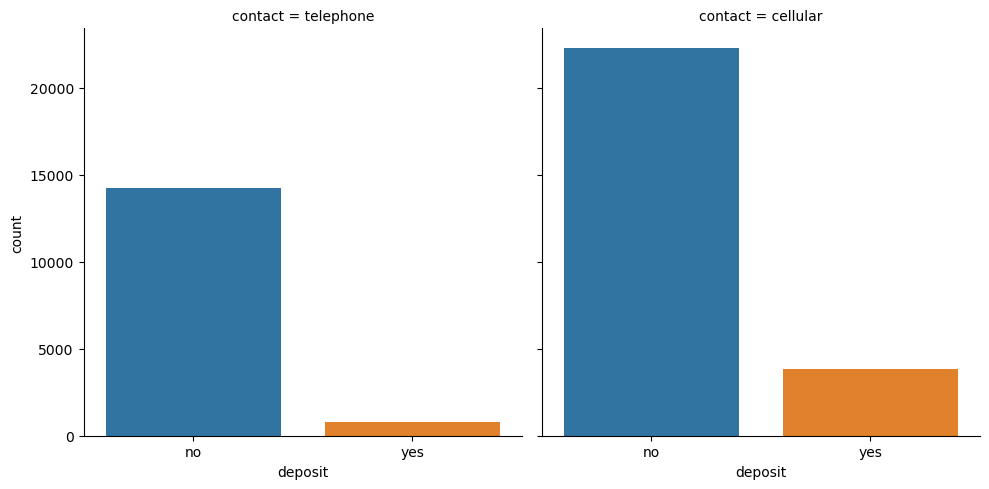

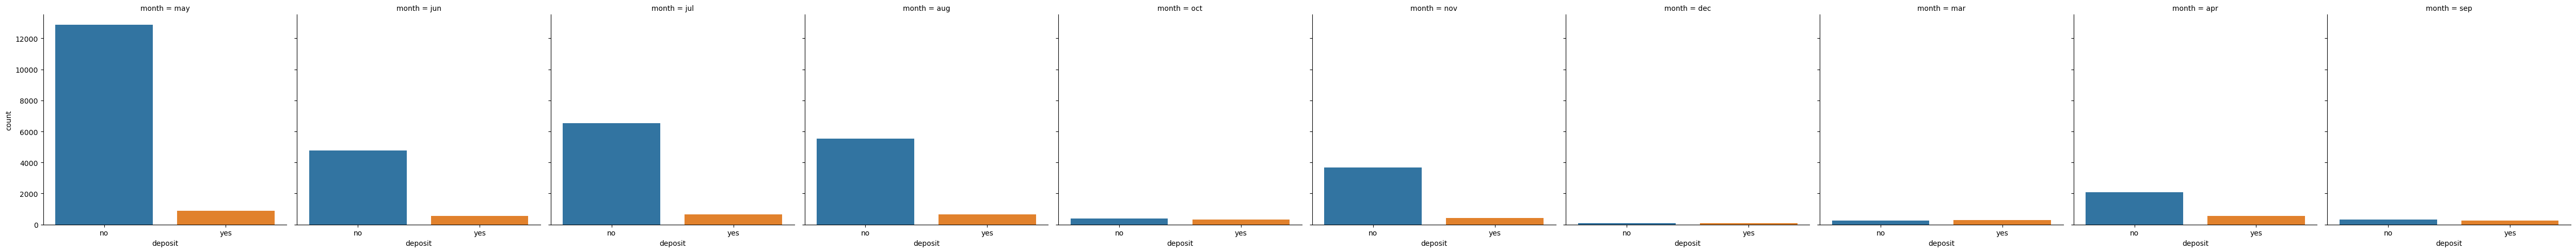

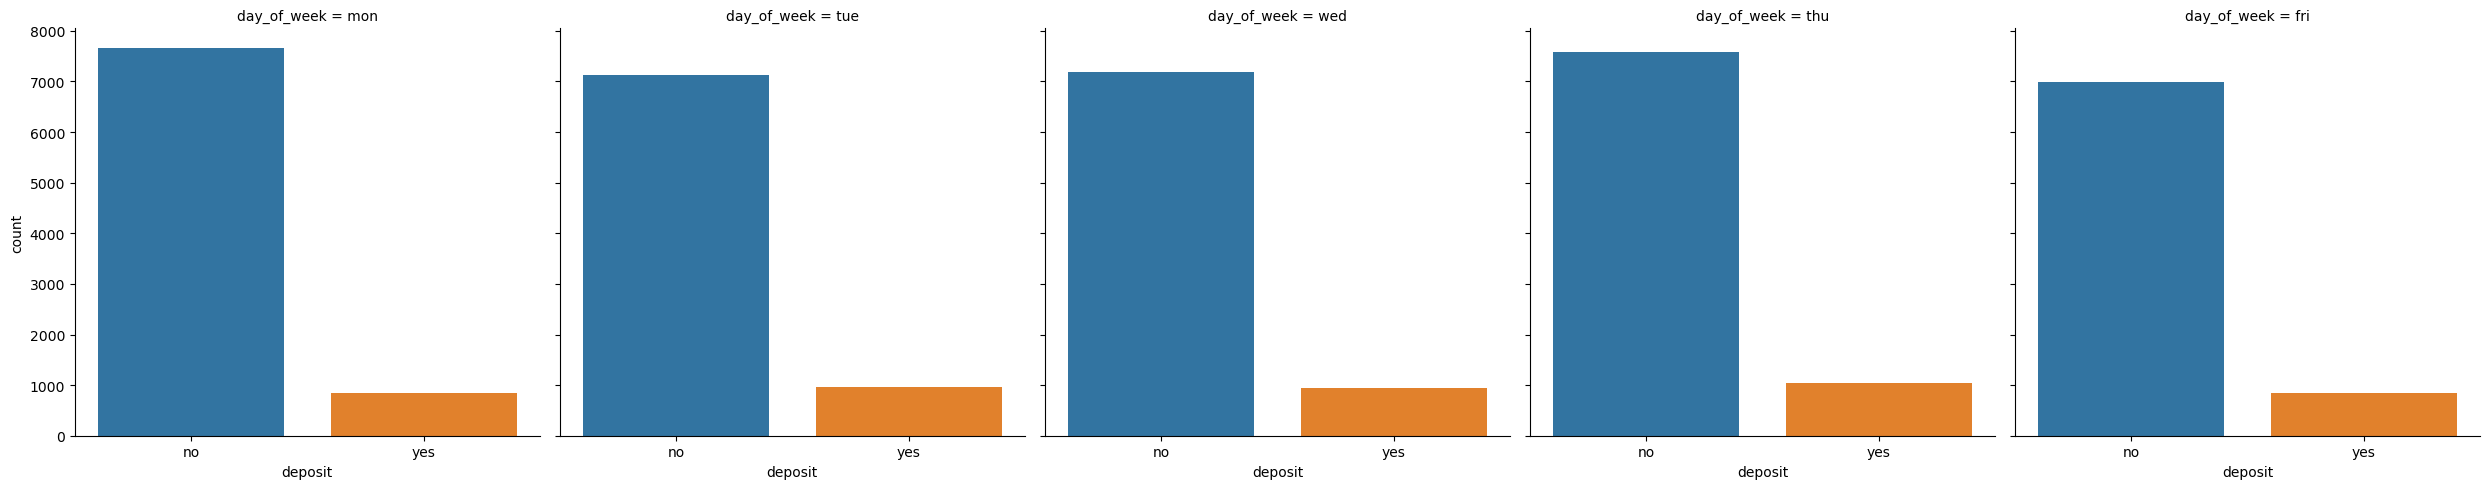

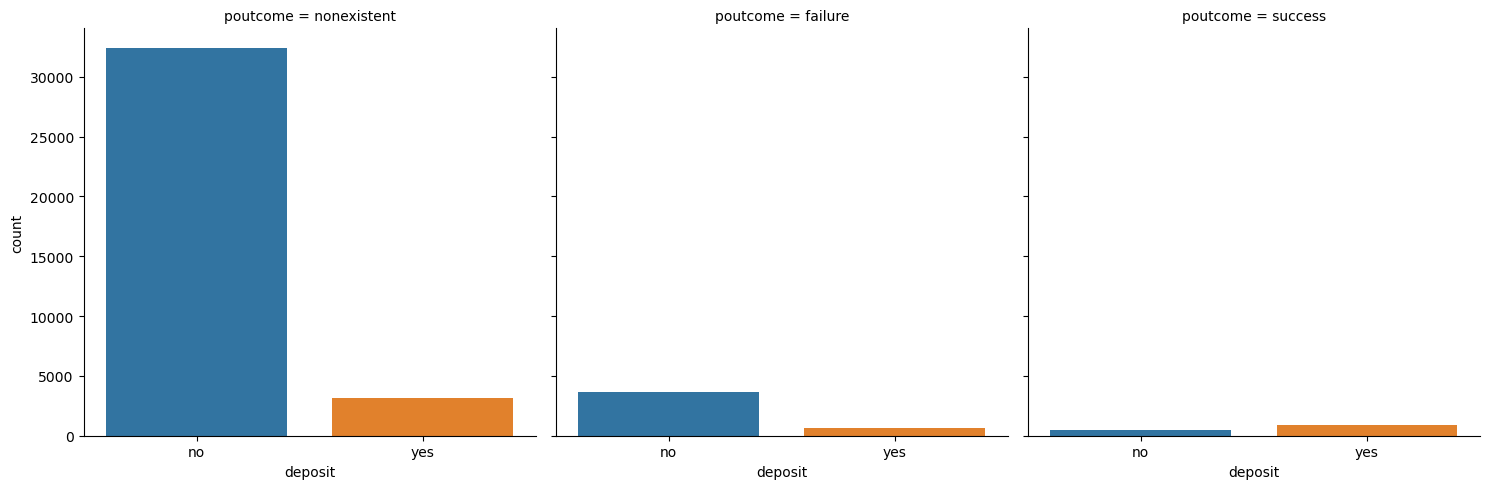

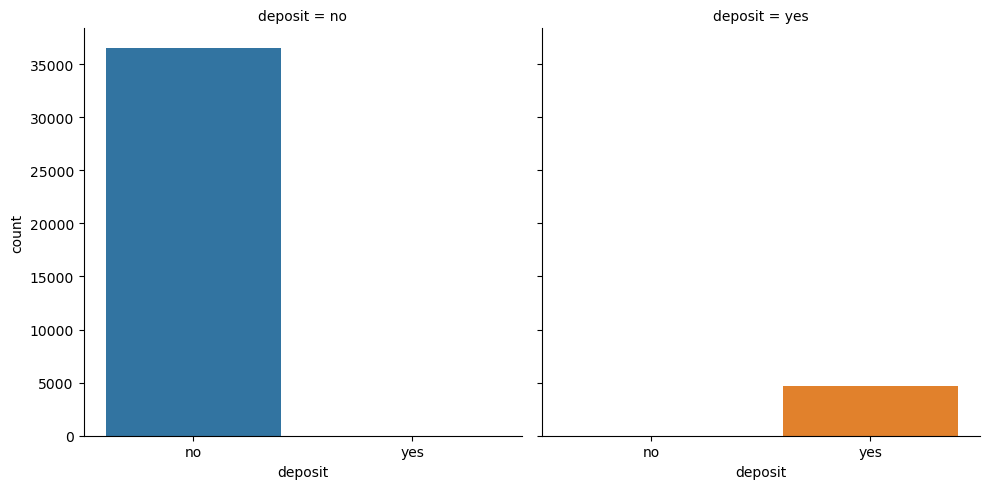

In [21]:
for categorical_features in cat_col:
    sns.catplot(x='deposit',col=categorical_features, kind='count', data=data)
plt.show()

# Data Preprocessing & Feature Engineering

* Remove Duplicates

In [22]:
duplicated_rows = data.loc[data.duplicated() == True]
duplicated_rows

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [23]:
data.drop_duplicates(inplace=True)

In [24]:
data.loc[data.duplicated() == True]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit


In [25]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


* replacing "unknown" with the mode

In [26]:
for column in cat_col:
    mode = data[column].mode()[0]
    data[column]= data[column].replace("unknown", mode)

In [27]:
data.head(15)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,no,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,university.degree,no,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


* Dropping unneeded variables

In [28]:
data.drop(columns=["pdays", "previous","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"], axis=1, inplace = True)

Since the columns 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', and 'nr.employed' mostly contain a single value and have low variance, they may not provide significant predictive power. Therefore, it is good to drop these columns from the DataFrame.

In [29]:
data.describe()

,age,duration,campaign
count,41176.00000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879
std,10.42068,259.305321,2.770318
min,17.00000,0.000000,1.000000
25%,32.00000,102.000000,1.000000
50%,38.00000,180.000000,2.000000
75%,47.00000,319.000000,3.000000
max,98.00000,4918.000000,56.000000


### Handling Outliers

### age

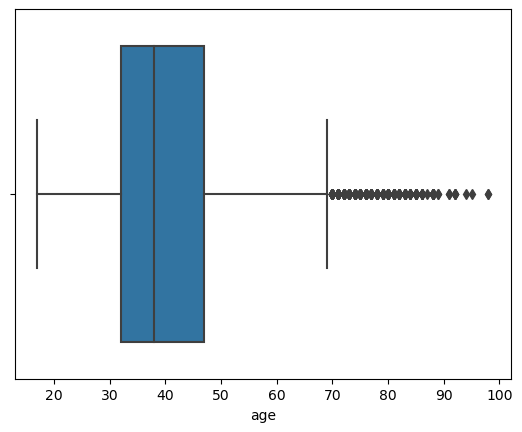

In [30]:
sns.boxplot(data['age'])
plt.show()

In [31]:
Q1=data.age.quantile(0.25)
Q1

32.0

In [32]:
Q3=data.age.quantile(0.75)
Q3

47.0

In [33]:
IQR = Q3 - Q1
print(IQR)

15.0


In [34]:
lower_fence = Q1 - 1.5*IQR
print(lower_fence)

9.5


In [35]:
upper_fence = Q3 + 1.5*IQR
print(upper_fence)

69.5


In [36]:
data.loc[data['age']<lower_fence]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,deposit


In [37]:
data.loc[data['age']>upper_fence]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,deposit
27713,70,retired,divorced,basic.4y,no,yes,no,cellular,mar,mon,187,3,nonexistent,yes
27757,76,retired,married,university.degree,no,no,yes,cellular,mar,thu,167,9,nonexistent,no
27780,73,retired,married,university.degree,no,yes,no,cellular,mar,tue,179,1,failure,no
27800,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,48,1,nonexistent,no
27802,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,266,2,nonexistent,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40986,84,retired,divorced,basic.4y,no,yes,yes,cellular,oct,mon,138,4,success,no
40996,81,retired,married,basic.4y,no,yes,no,cellular,oct,wed,621,1,failure,yes
41004,80,retired,married,professional.course,no,yes,no,cellular,oct,thu,411,1,failure,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,nonexistent,yes


* Imputing outliers with with median

In [38]:
data.loc[data['age']>upper_fence,'age']=np.median(data.age)

* Checking whether outlier remove or not

In [39]:
data.loc[data['age']>upper_fence]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,deposit


### duration

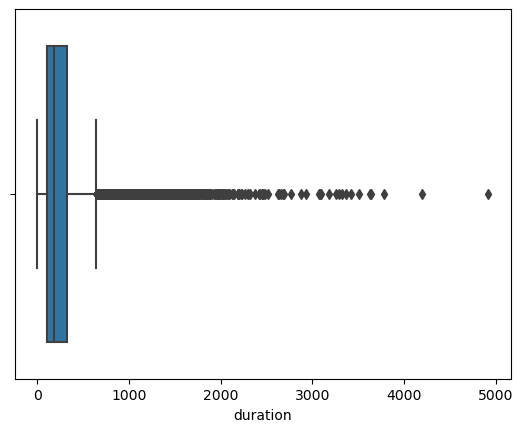

In [40]:
sns.boxplot(data['duration'])
plt.show()

In [41]:
Q1=data.duration.quantile(0.25)
Q1

102.0

In [42]:
Q3=data.duration.quantile(0.75)
Q3

319.0

In [43]:
IQR = Q3 - Q1
print(IQR)

217.0


In [44]:
lower_fence = Q1 - 1.5*IQR
lower_fence

-223.5

In [45]:
upper_fence = Q3 + 1.5*IQR
upper_fence

644.5

In [46]:
data.loc[data['duration']<lower_fence]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,deposit


In [47]:
data.loc[data['duration']>upper_fence]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,deposit
37,52,technician,married,basic.9y,no,yes,no,telephone,may,mon,1666,1,nonexistent,no
57,45,services,married,high.school,no,yes,no,telephone,may,mon,787,1,nonexistent,no
61,51,blue-collar,married,basic.9y,no,yes,no,telephone,may,mon,812,1,nonexistent,no
75,41,blue-collar,divorced,basic.4y,no,yes,no,telephone,may,mon,1575,1,nonexistent,yes
83,49,entrepreneur,married,university.degree,no,yes,no,telephone,may,mon,1042,1,nonexistent,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41147,25,technician,single,professional.course,no,yes,no,cellular,nov,fri,712,2,success,yes
41153,67,housemaid,divorced,professional.course,no,yes,no,cellular,nov,mon,655,2,success,yes
41160,33,admin.,married,university.degree,no,no,no,cellular,nov,tue,843,1,nonexistent,yes
41164,54,admin.,married,professional.course,no,no,no,cellular,nov,tue,1868,2,success,yes


* Imputing outlier with with median

In [48]:
data.loc[data['duration']>upper_fence,'duration']=np.median(data.duration)

* Checking whether outlier remove or not

In [49]:
data.loc[data['duration']>upper_fence]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,deposit


### campaign

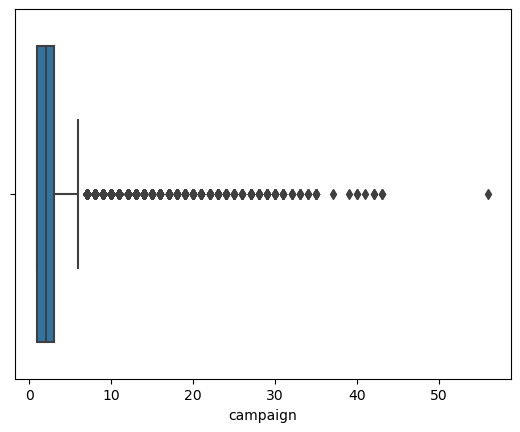

In [50]:
sns.boxplot(data['campaign'])
plt.show()

In [51]:
Q1 = data.campaign.quantile(0.25)
Q1

1.0

In [52]:
Q3 = data.campaign.quantile(0.75)
Q3

3.0

In [53]:
IQR = Q3 - Q1
IQR

2.0

In [54]:
lower_fence = Q1 - 1.5*IQR
lower_fence

-2.0

In [55]:
upper_fence = Q3 + 1.5*IQR
upper_fence

6.0

In [56]:
data.loc[data['campaign']<lower_fence]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,deposit


In [57]:
data.loc[data['campaign']>upper_fence]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,deposit
887,54,admin.,married,university.degree,no,no,no,telephone,may,wed,388,7,nonexistent,no
1043,41,technician,single,university.degree,no,no,no,telephone,may,wed,79,8,nonexistent,no
1094,40,technician,married,professional.course,no,yes,no,telephone,may,wed,253,8,nonexistent,no
1097,51,blue-collar,married,basic.4y,no,yes,no,telephone,may,wed,244,7,nonexistent,no
1230,48,blue-collar,divorced,basic.4y,no,no,no,telephone,may,thu,521,7,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40611,38,retired,married,basic.9y,no,no,no,telephone,sep,fri,543,9,failure,no
40631,38,retired,married,basic.4y,no,yes,no,cellular,sep,mon,213,7,nonexistent,no
40698,29,technician,single,professional.course,no,yes,no,cellular,sep,mon,157,7,success,no
40821,33,technician,single,professional.course,no,yes,no,cellular,sep,fri,246,9,failure,no


* Imputing outlier with with median

In [58]:
data.loc[data['campaign']>upper_fence,'campaign']=np.median(data.campaign)

* Checking whether outlier remove or not

In [59]:
data.loc[data['campaign']>upper_fence]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,deposit


In [60]:
data.describe()

,age,duration,campaign
count,41176.000000,41176.000000,41176.000000
mean,39.581212,201.596197,2.041748
std,9.621591,135.989810,1.242412
min,17.000000,0.000000,1.000000
25%,32.000000,102.000000,1.000000
50%,38.000000,180.000000,2.000000
75%,47.000000,265.000000,3.000000
max,69.000000,644.000000,6.000000


### Scaling the numerical features

In [61]:
df1 = data[['age', 'duration', 'campaign']]
df1.head()

,age,duration,campaign
0,56,261,1
1,57,149,1
2,37,226,1
3,40,151,1
4,56,307,1


In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df1 = scaler.fit_transform(df1)

In [63]:
scaled_df1

array([[0.75      , 0.4052795 , 0.        ],
       [0.76923077, 0.23136646, 0.        ],
       [0.38461538, 0.35093168, 0.        ],
       ...,
       [0.75      , 0.29347826, 0.2       ],
       [0.51923077, 0.6863354 , 0.        ],
       [0.40384615, 0.37111801, 0.4       ]])

In [64]:
scaled_data1 = pd.DataFrame(scaled_df1,columns=['age', 'duration', 'campaign'])
scaled_data1

,age,duration,campaign
0,0.750000,0.405280,0.0
1,0.769231,0.231366,0.0
2,0.384615,0.350932,0.0
3,0.442308,0.234472,0.0
4,0.750000,0.476708,0.0
...,...,...,...
41171,0.403846,0.518634,0.0
41172,0.557692,0.594720,0.0
41173,0.750000,0.293478,0.2
41174,0.519231,0.686335,0.0


## Converting categorical to numerical

In [65]:
cat_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')

In [66]:
df2 = data[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit']]
df2

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposit
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,no,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [67]:
for c in cat_col:
    print(c)
    print(data[c].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']
marital
['married' 'single' 'divorced']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
deposit
['no' 'yes']


* Education - Ordinal Variable - Ordinal Encoding

In [68]:
from sklearn.preprocessing import OrdinalEncoder

In [69]:
education_mapping = {'illiterate': 0,
                     'basic.4y': 1,
                     'basic.6y': 2,
                     'basic.9y': 3,
                     'high.school': 4,
                     'professional.course': 5,
                     'university.degree': 6,
                     'unknown': 7}

In [70]:
ordinal_encoder = OrdinalEncoder(categories=education_mapping)

In [71]:
df2['education_encoded'] = df2['education'].map(education_mapping)

In [72]:
df2.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposit,education_encoded
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no,1
1,services,married,high.school,no,no,no,telephone,may,mon,nonexistent,no,4
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no,4
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no,2
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no,4


In [73]:
from sklearn.preprocessing import OneHotEncoder

In [74]:
nominal_columns = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'deposit']

In [75]:
encoded_df = pd.get_dummies(df2[nominal_columns])

In [76]:
encoded_df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,deposit_no,deposit_yes
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0


In [77]:
df2_encoded = pd.concat([df2, encoded_df], axis=1)

In [78]:
df2_encoded.drop(nominal_columns, axis=1, inplace=True)

In [79]:
df2_encoded.head()

,education,education_encoded,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,deposit_no,deposit_yes
0,basic.4y,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
1,high.school,4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
2,high.school,4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
3,basic.6y,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
4,high.school,4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0


In [80]:
df2_encoded = df2_encoded.drop('deposit_no', axis=1)

In [81]:
df2_encoded.head()

,education,education_encoded,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,deposit_yes
0,basic.4y,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,high.school,4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,high.school,4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
3,basic.6y,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,high.school,4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [82]:
df2_encoded.drop('education', axis=1, inplace=True)

In [83]:
df2_encoded

,education_encoded,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,deposit_yes
0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
3,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
41184,5,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
41185,6,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
41186,5,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1


In [84]:
scaled_data1

,age,duration,campaign
0,0.750000,0.405280,0.0
1,0.769231,0.231366,0.0
2,0.384615,0.350932,0.0
3,0.442308,0.234472,0.0
4,0.750000,0.476708,0.0
...,...,...,...
41171,0.403846,0.518634,0.0
41172,0.557692,0.594720,0.0
41173,0.750000,0.293478,0.2
41174,0.519231,0.686335,0.0


In [85]:
df2_encoded

,education_encoded,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,deposit_yes
0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
3,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
41184,5,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
41185,6,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
41186,5,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1


In [86]:
scaled_data1.reset_index(drop=True, inplace=True)

In [87]:
df2_encoded.reset_index(drop=True, inplace=True)

In [88]:
df = pd.concat([scaled_data1,df2_encoded], axis=1)                                             

In [89]:
df

,age,duration,campaign,education_encoded,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,deposit_yes
0,0.750000,0.405280,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,0.769231,0.231366,0.0,4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,0.384615,0.350932,0.0,4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
3,0.442308,0.234472,0.0,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,0.750000,0.476708,0.0,4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,0.403846,0.518634,0.0,5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
41172,0.557692,0.594720,0.0,5,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
41173,0.750000,0.293478,0.2,6,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
41174,0.519231,0.686335,0.0,5,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1


In [90]:
df.rename(columns={'deposit_yes':'deposit_new'},inplace = True)

In [91]:
df.head()

,age,duration,campaign,education_encoded,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,deposit_new
0,0.750000,0.405280,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,0.769231,0.231366,0.0,4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,0.384615,0.350932,0.0,4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
3,0.442308,0.234472,0.0,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,0.750000,0.476708,0.0,4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [92]:
df['deposit_new'].value_counts()

0    36537
1     4639
Name: deposit_new, dtype: int64

The dataset is imbalanced with 36,537 instances belonging to the majority class (0) and 4,639 instances belonging to the minority class (1).

### Balancing the Dataset

In [93]:
from imblearn.over_sampling import SMOTE
X = df.drop('deposit_new', axis=1) 
y = df['deposit_new']  
smote = SMOTE()

In [94]:
X_resampled, y_resampled = smote.fit_resample(X, y)

In [95]:
print(y_resampled.value_counts())

0    36537
1    36537
Name: deposit_new, dtype: int64


# Feature Selection

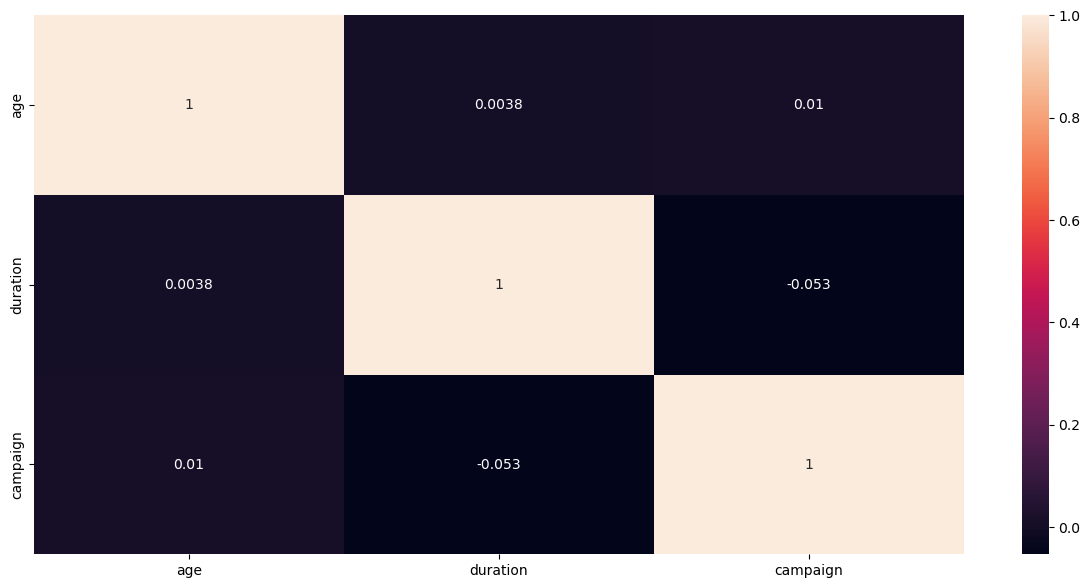

In [96]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True)
plt.show()

There are no features that are highly correlated.

### Train Test Split

In [97]:
X = df.drop(['deposit_new'], axis=1)
X.head()

,age,duration,campaign,education_encoded,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.750000,0.405280,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,0.769231,0.231366,0.0,4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,0.384615,0.350932,0.0,4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,0.442308,0.234472,0.0,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,0.750000,0.476708,0.0,4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [98]:
y = df[['deposit_new']]
y.head()

,deposit_new
0,0
1,0
2,0
3,0
4,0


In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [100]:
len(X_train)

58459

In [101]:
len(y_train)

58459

In [102]:
len(X_test)

14615

In [103]:
len(y_test)

14615

## Model Creation

### 1. Random Forest Classifier

In [104]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model

RandomForestClassifier()

In [105]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [106]:
y_pred = model.predict(X_test)

In [107]:
y_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=uint8)

In [108]:
y_test

4293     1
28313    1
42943    1
71581    1
67128    1
        ..
36037    0
19556    0
24155    0
30218    0
19925    0
Name: deposit_new, Length: 14615, dtype: uint8

In [109]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9460827916524119


In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      7348
           1       0.94      0.95      0.95      7267

    accuracy                           0.95     14615
   macro avg       0.95      0.95      0.95     14615
weighted avg       0.95      0.95      0.95     14615



In [111]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
k = 5
kfold = KFold(n_splits=k, shuffle=True, random_state=42)
scores = cross_val_score(rf_classifier, X_resampled, y_resampled, cv=kfold, scoring='accuracy')
for i, score in enumerate(scores):
    print(f"Fold {i+1} Accuracy: {score}")
mean_accuracy = scores.mean()
print(f"Mean Accuracy: {mean_accuracy}")

Fold 1 Accuracy: 0.94580910023948
Fold 2 Accuracy: 0.945877523092713
Fold 3 Accuracy: 0.9448511802942182
Fold 4 Accuracy: 0.9466985973315087
Fold 5 Accuracy: 0.9445052689202135
Mean Accuracy: 0.9455483339756267


### 2. Decision Tree Classifier

In [112]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2

DecisionTreeClassifier()

In [113]:
model2.fit(X_train,y_train)

DecisionTreeClassifier()

In [114]:
y_pred = model2.predict(X_test)

In [115]:
y_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=uint8)

In [116]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.901813205610674

In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      7348
           1       0.90      0.91      0.90      7267

    accuracy                           0.90     14615
   macro avg       0.90      0.90      0.90     14615
weighted avg       0.90      0.90      0.90     14615



In [118]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
dtc_classifier = DecisionTreeClassifier()
k = 5
kfold = KFold(n_splits=k, shuffle=True, random_state=42)
scores = cross_val_score(dtc_classifier, X_resampled, y_resampled, cv=kfold, scoring='accuracy')
for i, score in enumerate(scores):
    print(f"Fold {i+1} Accuracy: {score}")
mean_accuracy = scores.mean()
print(f"Mean Accuracy: {mean_accuracy}")

Fold 1 Accuracy: 0.9040711597673623
Fold 2 Accuracy: 0.9027711255559356
Fold 3 Accuracy: 0.902018474170373
Fold 4 Accuracy: 0.8970236058843654
Fold 5 Accuracy: 0.8994115231969344
Mean Accuracy: 0.9010591777149941


### 3. Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression() 
model3

LogisticRegression()

In [120]:
model3.fit(X_train,y_train)

LogisticRegression()

In [121]:
y_pred = model2.predict(X_test)

In [122]:
y_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=uint8)

In [123]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.901813205610674

In [124]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      7348
           1       0.90      0.91      0.90      7267

    accuracy                           0.90     14615
   macro avg       0.90      0.90      0.90     14615
weighted avg       0.90      0.90      0.90     14615



In [125]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
k = 5
kfold = KFold(n_splits=k, shuffle=True, random_state=42)
scores = cross_val_score(lr, X_resampled, y_resampled, cv=kfold, scoring='accuracy')
for i, score in enumerate(scores):
    print(f"Fold {i+1} Accuracy: {score}")
mean_accuracy = scores.mean()
print(f"Mean Accuracy: {mean_accuracy}")

Fold 1 Accuracy: 0.8851864522750599
Fold 2 Accuracy: 0.884775915155662
Fold 3 Accuracy: 0.8827232295586726
Fold 4 Accuracy: 0.8821758467328088
Fold 5 Accuracy: 0.889763240728069
Mean Accuracy: 0.8849249368900545


## Conclusion

We decided to drop default, pdays, previous, day_of_week, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m and nr.employed after analyzing the data.

We found that there are few strong correlation between each variable.

It was a imbalanced dataset. so we balanced the dataset

We tried 3 different models as our first step in modelling process, to evaluate & choose the best model as our baseline model.

Models are as below:

1) Random Forest Classifier - accuracy score = 0.9460827916524119  Recall = 0.95

2) Decision Tree Classifier - accuracy score = 0.901813205610674   Recall = 0.90

3) Logistic Regression - accuracy score = 0.901813205610674    Recall = 0.90 

The Random Forest Classifier achieved the highest accuracy score of 0.94, indicating that it performed the best among the three models.

The Random Forest Classifier also demonstrated higher precision, recall, and F1-scores for both classes compared to the Decision Tree Classifier and Logistic Regression models.

The Decision Tree Classifier and Logistic Regression models had similar accuracy scores and classification metrics, with no significant differences observed between them.

Based on these results, the Random Forest Classifier appears to be the most effective model for the given problem of portuguese bank marketing.

Based on the result, we found out that RandomForest Classifer with highest Recall 0.95 or 95%

We are able to minimize False Negative rate by maximizing our evaluation metric which is Recall by 95%.